# **Task-4**
# **SPAM SMS DETECTION**

# Build an AI model that can classify SMS messages as spam orlegitimate. Use techniques like TF-IDF or word embeddings withclassifiers like Naive Bayes, Logistic Regression, or Support VectorMachines to identify spam messages

Step:1 Importing Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Check columns before dropping to avoid KeyError
existing_columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop([col for col in existing_columns if col in df.columns], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


* Step:2 Checking the missing values

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
# Drop the duplicate values
df.duplicated().sum()

403

In [8]:
# After droping the duplicate values
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

Step:3 Label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])
df.head()

<ipython-input-9-bbc6b3f6817b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1'] = encoder.fit_transform(df['v1'])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

* Step:4 Remove special characters and punctuation. Convert text to lowercase. Remove stop words.

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    ps = PorterStemmer()
    stemmed_text = [ps.stem(word) for word in filtered_text]
    return ' '.join(stemmed_text)
df['v2'] = df['v2'].apply(preprocess_text)

In [14]:
#df['v2']

Step:5 Visualization

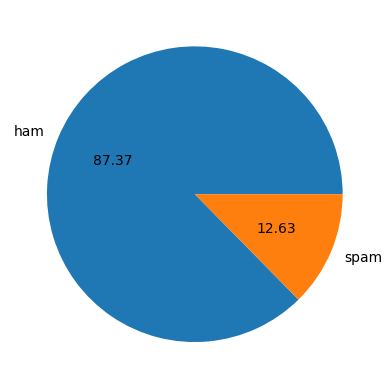

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['v1'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string # Import the string module

ps = PorterStemmer()

In [19]:
def text_transform(text) :
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)

    text = y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))


    return " ".join(y)

In [20]:
text_transform("HELLO World I am Happy!!!")

'hello world happi'

In [21]:
df['transformed_text'] = df['v2'].apply(text_transform)
df.head()

,v1,v2,transformed_text
0,0,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though,nah think goe usf live around though


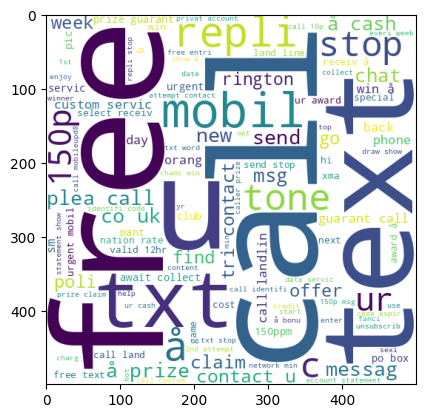

In [22]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

spam = wc.generate(df[df['v1'] == 1]['transformed_text'].str.cat(sep=" "))

plt.imshow(spam)

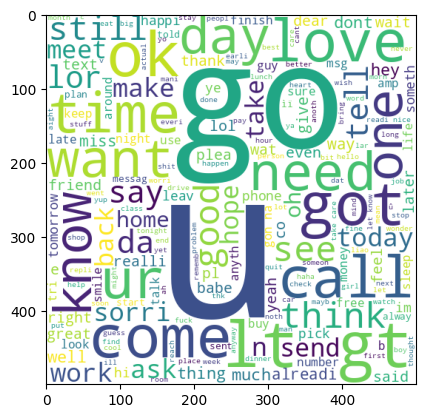

In [23]:
ham = wc.generate(df[df['v1'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham)

In [24]:
spam_corpus = []
for msg in df[df['v1'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

11994

In [25]:
ham_corpus = []
for msg in df[df['v1'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

36351

<ipython-input-26-0e2c6617bac6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df,palette=colors)


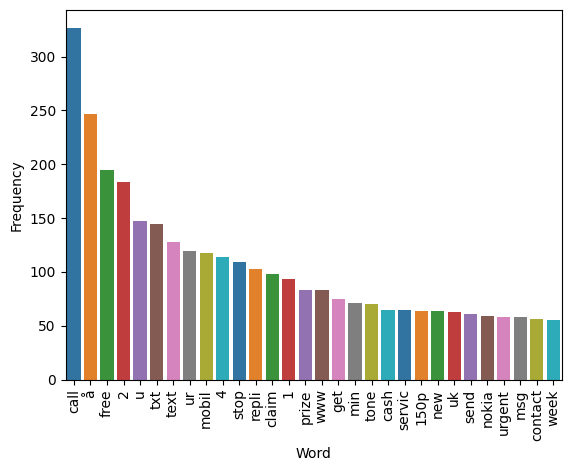

In [26]:
from collections import Counter
import seaborn as sns

# Count occurrences of each item in the list 'spam_corpus'
freq = dict(Counter(spam_corpus).most_common(30))

# Create a pandas DataFrame from the dictionary 'freq'
df = pd.DataFrame({'Word': list(freq.keys()), 'Frequency': list(freq.values())})
colors = sns.color_palette("tab10", len(df))

# Create a barplot using seaborn
sns.barplot(x='Word', y='Frequency', data=df,palette=colors)

plt.xticks(rotation='vertical')
plt.show()

<ipython-input-27-18891548dcaf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df,palette=colors)


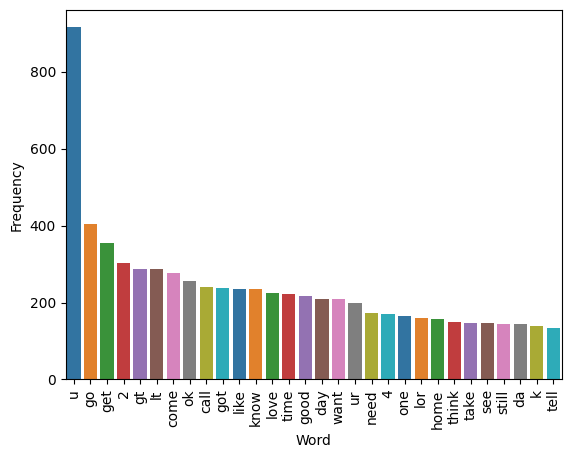

In [27]:
# Count occurrences of each item in the list 'spam_corpus'
freq = dict(Counter(ham_corpus).most_common(30))

# Create a pandas DataFrame from the dictionary 'freq'
df = pd.DataFrame({'Word': list(freq.keys()), 'Frequency': list(freq.values())})
colors = sns.color_palette("tab10", len(df))
# Create a barplot using seaborn
sns.barplot(x='Word', y='Frequency', data=df,palette=colors)

plt.xticks(rotation='vertical')
plt.show()

* Step:6 Split the dataset & Training and Evalute model

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [36]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

gnb.fit(X_train_vec.toarray(), y_train)
y_pred1 = gnb.predict(X_test_vec.toarray())
print("For Gaussian Naive Bayes Classification")
print("Accuracy Score is:",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred1))
print("Precision Score:",precision_score(y_test,y_pred1))
print("Classification Report:\n",classification_report(y_test, y_pred1))

For Gaussian Naive Bayes Classification
Accuracy Score is: 0.8820116054158608
Confusion Matrix:
 [[794 102]
 [ 20 118]]
Precision Score: 0.5363636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       896
           1       0.54      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.76      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034



In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

mnb.fit(X_train_vec, y_train)
y_pred2 = mnb.predict(X_test_vec)
print("For Multinomial Naive Bayes Classification")
print("Accuracy Score is:",accuracy_score(y_test,y_pred2))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2))
print("Precision Score:",precision_score(y_test,y_pred2))
print("Classification Report:\n",classification_report(y_test, y_pred2))

For Multinomial Naive Bayes Classification
Accuracy Score is: 0.9613152804642167
Confusion Matrix:
 [[896   0]
 [ 40  98]]
Precision Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.71      0.83       138

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

bnb.fit(X_train_vec, y_train)
y_pred3 = bnb.predict(X_test_vec)
print("For Bernoulli Naive Bayes Classification")
print("Accuracy Score is:",accuracy_score(y_test,y_pred3))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred3))
print("Precision Score:",precision_score(y_test,y_pred3))
print("Classification Report:\n",classification_report(y_test, y_pred3))

For Bernoulli Naive Bayes Classification
Accuracy Score is: 0.9729206963249516
Confusion Matrix:
 [[896   0]
 [ 28 110]]
Precision Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.80      0.89       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [76]:
clfs = { 'Support Vector Classification' : svc, 'Logistic Regression': lrc,}

def classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy,precision,class_report,conf_matrix

In [77]:
accuracy_scores = []
precision_scores = []
class_report =[]
conf_matrix = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_class_report,current_conf_matrix = classifier(clf, X_train_vec,y_train,X_test_vec,y_test)

    print("For ",name)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)
    print("Classification Report :\n ",current_class_report)
    print("Confusion Matrix : \n",current_conf_matrix)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    class_report.append(current_class_report)
    conf_matrix.append(current_conf_matrix)

For  Support Vector Classification
Accuracy :  0.9787234042553191
Precision :  0.967741935483871
Classification Report :
                precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.87      0.92       138

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Confusion Matrix : 
 [[892   4]
 [ 18 120]]
For  Logistic Regression
Accuracy :  0.9564796905222437
Precision :  0.918918918918919
Classification Report :
                precision    recall  f1-score   support

           0       0.96      0.99      0.98       896
           1       0.92      0.74      0.82       138

    accuracy                           0.96      1034
   macro avg       0.94      0.86      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Confusion Matrix : 
 [[887   9]
 [ 36 102]]


In [64]:
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance

,Algorithm,Accuracy,Precision
0,SVC,0.978723,0.967742
1,LR,0.956480,0.918919


In [67]:
perform = pd.melt(performance, id_vars = "Algorithm")
perform

,Algorithm,variable,value
0,SVC,Accuracy,0.978723
1,LR,Accuracy,0.956480
2,SVC,Precision,0.967742
3,LR,Precision,0.918919


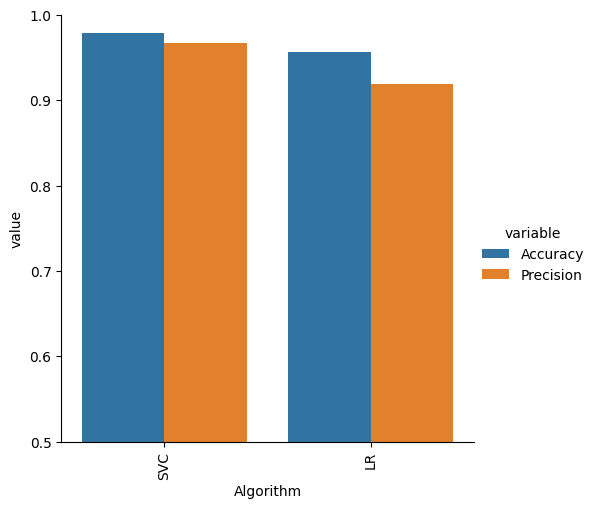

In [68]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=perform, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [103]:
# New example strings
example_strings = [
    "FREE entry into our exclusive contest! Just reply with 'YES' to enter.",
    "Your appointment is confirmed for Monday at 10 AM.",
    "Congratulations! You've been selected for a free iPhone. Click here to claim your prize.",
    "Can you send me the report by end of the day?"
]

# Transform the example strings using the same TF-IDF Vectorizer
example_strings_tfidf = tfidf_vectorizer.transform(example_strings)

# Predict the labels for the example strings
example_predictions = model.predict(example_strings_tfidf)

# Map numerical labels back to 'spam' and 'ham'
label_map = {0: 'ham', 1: 'spam'}
example_predictions_labels = [label_map[pred] for pred in example_predictions]

# Print the predictions
for i, example in enumerate(example_strings):
    print(f"Message: {example}\nPrediction: {example_predictions_labels[i]}\n")

Message: FREE entry into our exclusive contest! Just reply with 'YES' to enter.
Prediction: spam

Message: Your appointment is confirmed for Monday at 10 AM.
Prediction: ham

Message: Congratulations! You've been selected for a free iPhone. Click here to claim your prize.
Prediction: spam

Message: Can you send me the report by end of the day?
Prediction: ham



# **Conclusion**
# The  model performed well on the test set, achieving a high accuracy.
# The classification report and confusion matrix indicated that the model had a high precision, recall, and F1-score, particularly in identifying spam messages.
# The model successfully classified new example strings as either spam or ham, validating its effectiveness.